In [1]:
import re
import matplotlib.pyplot as plt
import math

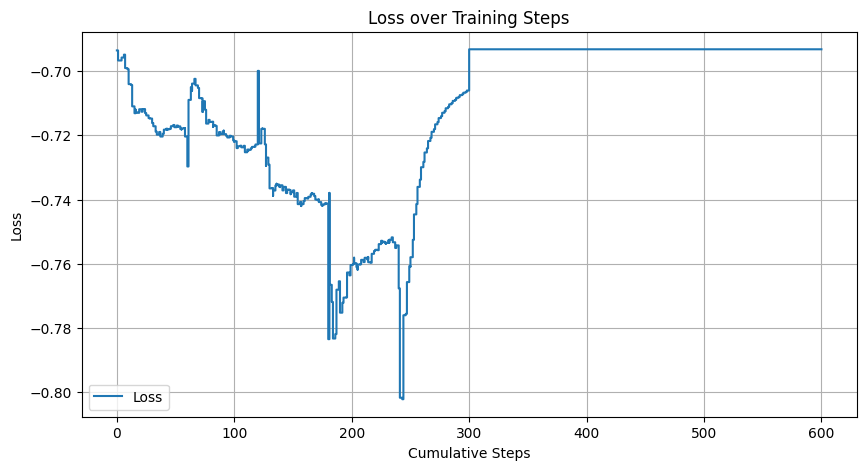

In [7]:
import re
import matplotlib.pyplot as plt

# Constants
NUM_EXAMPLES = 3789
TRAIN_BATCH_SIZE = 64
STEPS_PER_EPOCH = -(-NUM_EXAMPLES // TRAIN_BATCH_SIZE)  # Ceiling division

# Open and read the log file
log_file_path = "learning_to_rank_log-pn131274.97662.out"  # Replace with the actual file path
with open(log_file_path, "r") as file:
    log_data = file.read()

# Extracting data
pattern = r"epoch (\d+) loss (-?\d+\.\d+):\s+.*?(\d+)%\|"
matches = re.findall(pattern, log_data)

# Process data
cumulative_steps = []
losses = []

for epoch, loss, progress in matches:
    epoch_num = int(epoch)
    loss_value = float(loss)
    step_within_epoch = int(progress) * STEPS_PER_EPOCH // 100  # Approximate step within epoch
    cumulative_step = epoch_num * STEPS_PER_EPOCH + step_within_epoch
    cumulative_steps.append(cumulative_step)
    losses.append(loss_value)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(cumulative_steps, losses, label='Loss')
plt.title('Loss over Training Steps')
plt.xlabel('Cumulative Steps')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
